In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import math

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0:"City"})

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""

In [4]:
limit = len(city_df)/50
set_var = 1
data_count = 50
dummy_array = [];


base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {'appid': api_key, 'units': 'Imperial'}

for index, row in city_df.iterrows():
    if len(dummy_array) < data_count and set_var <= math.ceil(limit):
        city_row = row['City']
        dummy_array.append(city_row)
       
        params['q'] = city_row

        response = requests.get(base_url, params=params).json()
    
    else:
        set_var = set_var + 1
        data_count = data_count + 49
        time.sleep(60)

    
    try:
        pprint(f"Processing Record for index #{index + 1} / set {set_var}: {city_row}")

        city_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'Country'] = response['sys']['country']
        city_df.loc[index, 'Date'] = response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_df.loc[index, 'Lat'] = response['coord']['lat']
        city_df.loc[index, 'Lng'] = response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        pprint("Missing field/result... skipping.")
        
    print("------------")

'Processing Record for index #1 / set 1: mataura'
------------
'Processing Record for index #2 / set 1: kavieng'
------------
'Processing Record for index #3 / set 1: cape town'
------------
'Processing Record for index #4 / set 1: torbay'
------------
'Processing Record for index #5 / set 1: ossora'
------------
'Processing Record for index #6 / set 1: cherskiy'
------------
'Processing Record for index #7 / set 1: bredasdorp'
------------
'Processing Record for index #8 / set 1: taolanaro'
'Missing field/result... skipping.'
------------
'Processing Record for index #9 / set 1: hermanus'
------------
'Processing Record for index #10 / set 1: norman wells'
------------
'Processing Record for index #11 / set 1: nyagan'
------------
'Processing Record for index #12 / set 1: dikson'
------------
'Processing Record for index #13 / set 1: ushuaia'
------------
'Processing Record for index #14 / set 1: busselton'
------------
'Processing Record for index #15 / set 1: egvekinot'
------------

------------
'Processing Record for index #121 / set 3: agropoli'
------------
'Processing Record for index #122 / set 3: ipixuna'
------------
'Processing Record for index #123 / set 3: kavaratti'
------------
'Processing Record for index #124 / set 3: kaitangata'
------------
'Processing Record for index #125 / set 3: hofn'
------------
'Processing Record for index #126 / set 3: qaqortoq'
------------
'Processing Record for index #127 / set 3: marcona'
'Missing field/result... skipping.'
------------
'Processing Record for index #128 / set 3: lisburn'
------------
'Processing Record for index #129 / set 3: jaciara'
------------
'Processing Record for index #130 / set 3: sao gabriel'
------------
'Processing Record for index #131 / set 3: sao joao da barra'
------------
'Processing Record for index #132 / set 3: port elizabeth'
------------
'Processing Record for index #133 / set 3: yulara'
------------
'Processing Record for index #134 / set 3: mar del plata'
------------
'Processing

'Processing Record for index #235 / set 5: muisne'
------------
'Processing Record for index #236 / set 5: boa vista'
------------
'Processing Record for index #237 / set 5: turukhansk'
------------
'Processing Record for index #238 / set 5: nizhneyansk'
'Missing field/result... skipping.'
------------
'Processing Record for index #239 / set 5: broken hill'
------------
'Processing Record for index #240 / set 5: pathein'
------------
'Processing Record for index #241 / set 5: murmashi'
------------
'Processing Record for index #242 / set 5: san cristobal'
------------
'Processing Record for index #243 / set 5: ituni'
'Missing field/result... skipping.'
------------
'Processing Record for index #244 / set 5: pemangkat'
'Missing field/result... skipping.'
------------
'Processing Record for index #245 / set 5: saint-joseph'
------------
'Processing Record for index #246 / set 5: rio gallegos'
------------
'Processing Record for index #247 / set 5: carnarvon'
------------
'Processing Reco

------------
'Processing Record for index #351 / set 8: ishim'
------------
'Processing Record for index #352 / set 8: castro'
------------
'Processing Record for index #353 / set 8: viedma'
------------
'Processing Record for index #354 / set 8: beringovskiy'
------------
'Processing Record for index #355 / set 8: onda'
------------
'Processing Record for index #356 / set 8: tanabe'
------------
'Processing Record for index #357 / set 8: vestmannaeyjar'
------------
'Processing Record for index #358 / set 8: nemuro'
------------
'Processing Record for index #359 / set 8: auki'
------------
'Processing Record for index #360 / set 8: jumla'
------------
'Processing Record for index #361 / set 8: havoysund'
------------
'Processing Record for index #362 / set 8: safwah'
'Missing field/result... skipping.'
------------
'Processing Record for index #363 / set 8: santa cruz'
------------
'Processing Record for index #364 / set 8: am timan'
------------
'Processing Record for index #365 / se

'Processing Record for index #468 / set 10: cooma'
------------
'Processing Record for index #469 / set 10: mier'
------------
'Processing Record for index #470 / set 10: bushtyno'
------------
'Processing Record for index #471 / set 10: veraval'
------------
'Processing Record for index #472 / set 10: rosetown'
------------
'Processing Record for index #473 / set 10: debre tabor'
------------
'Processing Record for index #474 / set 10: urdzhar'
'Missing field/result... skipping.'
------------
'Processing Record for index #475 / set 10: manyana'
------------
'Processing Record for index #476 / set 10: moctezuma'
------------
'Processing Record for index #477 / set 10: ancud'
------------
'Processing Record for index #478 / set 10: yerbogachen'
------------
'Processing Record for index #479 / set 10: arrecife'
'Missing field/result... skipping.'
------------
'Processing Record for index #480 / set 10: lungi'
------------
'Processing Record for index #481 / set 10: akhmim'
------------
'

------------
'Processing Record for index #585 / set 12: poltavka'
------------
'Processing Record for index #586 / set 12: vila velha'
------------
'Processing Record for index #587 / set 12: tianpeng'
------------
'Processing Record for index #588 / set 12: luganville'
------------
'Processing Record for index #589 / set 12: jibuti'
'Missing field/result... skipping.'
------------
'Processing Record for index #590 / set 12: roebourne'
------------
'Processing Record for index #591 / set 12: robertsport'
------------
'Processing Record for index #592 / set 12: visby'
------------
'Processing Record for index #593 / set 12: ballina'
------------
'Processing Record for index #594 / set 12: dzaoudzi'
------------
'Processing Record for index #595 / set 12: hambantota'
------------
'Processing Record for index #596 / set 12: aykhal'
------------
'Processing Record for index #597 / set 12: nome'
------------
'Processing Record for index #598 / set 12: warqla'
'Missing field/result... skipp

In [5]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,48,NZ,72.65,68,-46.19,168.86,72.65,14.12
1,kavieng,64,PG,85.07,98,-2.57,150.8,85.07,8.75
2,cape town,75,ZA,66,93,-33.93,18.42,66,13.87
3,torbay,40,CA,30.99,92,47.66,-52.73,30.99,19.46
4,ossora,68,RU,15.68,96,59.24,163.07,15.68,15.46
5,cherskiy,0,RU,4.52,60,68.75,161.3,4.52,7.96
6,bredasdorp,92,ZA,66.2,93,-34.53,20.04,66.2,8.05
7,taolanaro,,,,,,,,
8,hermanus,80,ZA,64,98,-34.42,19.24,64,2.15
9,norman wells,75,CA,30.2,92,65.28,-126.83,30.2,2.24


In [6]:
city_df.to_csv("WeatherDatabyCity.csv", index=False, header=True)
city_df = pd.read_csv("WeatherDatabyCity.csv")
city_df.fillna("")
city_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]].count()

City          622
Cloudiness    550
Country       544
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

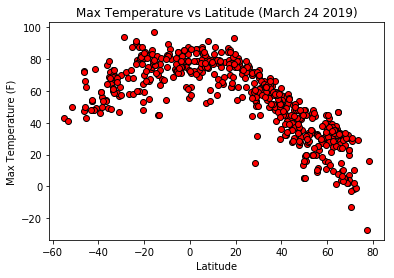

In [7]:
# Latitude vs. Temperature Plot

date = datetime.datetime.today().strftime("%B %d %Y")
date = date.lstrip("0")

latitude = city_df["Lat"]
temperature = city_df["Max Temp"]
plt.scatter(latitude, temperature, facecolors="red", edgecolors="black")
plt.title(f"Max Temperature vs Latitude ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("./Max Temperature_vs_Latitude.png")
plt.show()

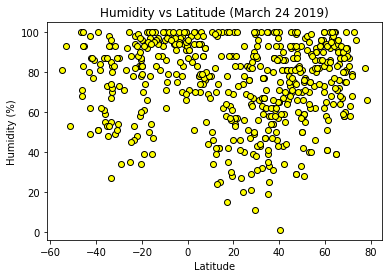

In [8]:
# Latitude vs. Humidity Plot

humidity = city_df["Humidity"]
plt.scatter(latitude, humidity, facecolors="yellow", edgecolors="black")
plt.title(f"Humidity vs Latitude ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("./Humidity_vs_Latitude.png")
plt.show()

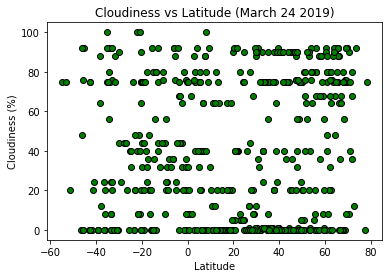

In [9]:
# Latitude vs. Cloudiness Plot

cloudiness = city_df["Cloudiness"]
plt.scatter(latitude, cloudiness, facecolors="green", edgecolors="black")
plt.title(f"Cloudiness vs Latitude ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("./Cloudiness_vs_Latitude.png")
plt.show()

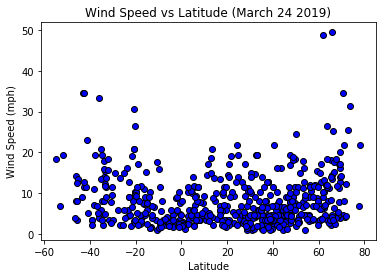

In [10]:
# Latitude vs. Wind Speed Plot

wind_speed = city_df["Wind Speed"]
plt.scatter(latitude, wind_speed, facecolors="blue", edgecolors="black")
plt.title(f"Wind Speed vs Latitude ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("./Wind Speed_vs_Latitude.png")
plt.show()